## Observations and Insights 

In this study, 249 mice were identifed with squamous cell carcinoma (SCC) tumor growths and were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens.

From this study, we can conclude that Capomulin was effective in significantly reducing the average SCC tumor volume in mice over 45 days. Since we have a positive correlation between mouse weight and average tumor volume of 0.84, we can assume that heavier mice typically don't react as well to the drug treatment as lighter mice do. A limitation of this study has to do with the sex of the mice. Since the study had a nearly equal amount of female and male mice, we can't tell whether sex had an effect on the treament. 

In [147]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [154]:
# Checking the number of mice.
mice = len(merged_df["Mouse ID"])
mice_total = pd.DataFrame({"Total Mice": [mice]})
mice_total

,Total Mice
0,1893


In [149]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merged_df[merged_df.duplicated(["Mouse ID","Timepoint"])]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [150]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouseID = merged_df[merged_df.duplicated(["Mouse ID"])]
duplicate_mouseID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [152]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop_duplicates(["Mouse ID", "Timepoint"])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [100]:
# Checking the number of mice in the clean DataFrame.
mice_clean = len(clean_df["Mouse ID"].unique())
mice_clean_total = pd.DataFrame({"Total Mice": [mice]})
mice_clean_total

,Total Mice
0,249


## Summary Statistics

In [101]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#Basic calculations and group by drug regimen
mean = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

#Create DataFrame
summary_df = pd.DataFrame({"Mean": mean, 
                           "Median": median, 
                           "Variance": variance, 
                           "Standard Deviation": standard_dv, 
                           "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [131]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
treatment_df = pd.DataFrame(merged_df.groupby(["Drug Regimen"]).count()).reset_index()
#Keep mouse ID and Drug Regimen columns only
treatment_BP = treatment_df[["Drug Regimen","Mouse ID"]]
treatment_BP = treatment_BP.set_index("Drug Regimen")

treatment_BP

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


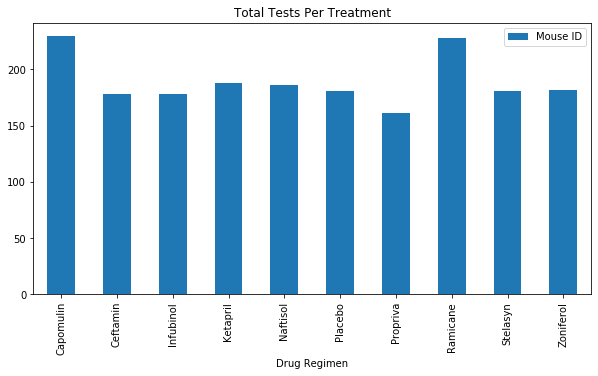

<Figure size 432x288 with 0 Axes>

In [104]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
treatment_BP.plot(kind="bar",figsize=(10,5))

plt.title("Total Tests Per Treatment")
plt.show()
plt.tight_layout()

In [105]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(merged_df.groupby(["Sex"]).count()).reset_index()
#keep sex and mouse ID columns only
gender_df = gender_df[["Sex","Mouse ID"]]

gender_df.head()

,Sex,Mouse ID
0,Female,935
1,Male,958


Text(0, 0.5, '')

<Figure size 1008x504 with 0 Axes>

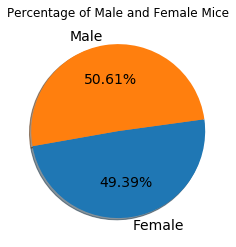

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(14,7))

gender_df.plot(kind="pie", y = "Mouse ID", autopct='%1.2f%%',
              startangle=190, shadow=True, labels=gender_df["Sex"], legend = False, fontsize=14)

plt.title("Percentage of Male and Female Mice")
plt.xlabel("")
plt.ylabel("")

## Quartiles, Outliers and Boxplots

In [263]:
# Start by getting the last (greatest) timepoint for each mouse
tumor_volume = clean_df[clean_df["Drug Regimen"].isin(top_four)]

In [264]:
#Group by drug regimen and mouse ID using .agg to calculate final tumor volume per mouse across the four treatments
drug_regimen = tumor_volume.groupby(['Drug Regimen','Mouse ID']).agg(\
                                                                
#Get last value of tumor size using a lambda function
last_tumor = ('Tumor Volume (mm3)', lambda x: x.iloc[-1])).round(3)

drug_regimen 

last_tumor
Drug Regimen Mouse ID            
Capomulin    b128          38.983
             b742          38.940
             f966          30.486
             g288          37.074
             g316          40.159
...                           ...
Ramicane     s508          30.276
             u196          40.668
             w678          43.166
             y449          44.183
             z578          30.639

[100 rows x 1 columns]

In [265]:
# Reshape dataframe with Drug Regimen as columns by using unstack and move Last_tumor_size to index using stack
four_last_tumor = drug_regimen.stack(level=0).unstack(level=0)
# View the result to confirm transpose
four_last_tumor.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,last_tumor,NaN,NaN,67.973,NaN
a251,last_tumor,NaN,NaN,65.526,NaN
a275,last_tumor,NaN,62.999,NaN,NaN
a411,last_tumor,NaN,NaN,NaN,38.408
a444,last_tumor,NaN,NaN,NaN,43.048


In [270]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
top_four = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
    
# Put treatments into a list for for loop (and later for plot labels)
counter = 0

for drug in top_four:
    quartiles = four_last_tumor[drug].quantile([.25,.5,.75])
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq, 2)
    lower_bound = round(lowerq - (1.5 * iqr), 2)
    upper_bound = round(upperq + (1.5 * iqr), 2)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    if counter == 0:
        print(f"----------------------------------------------------")
    print(f"{drug} IQR data is:")  
    print(f"The lower quartile of {drug}s: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"----------------------------------------------------")
    counter += 1


----------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulins: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The median of Capomulin is: 38.125 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
----------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicanes: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The median of Ramicane is: 36.562 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
----------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinols: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The median of Infubinol is: 60.165 
Values below 36.83 for Infubinol could be outliers.
Values above 82.75 for Infu

In [288]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Create an empty list
drug_values = []

# Iterate through the list of the four drugs names using them to select the same column names
# and appending to the boxplot_list
for drug in top_four:
    temp_df = merged_df.loc[merged_df['Drug Regimen'] == drug]
    
    # Create subset dataframes that narrows down to rows only containing the final timepoint for each regimen
    final_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['Timepoint']]
    
    # Create a series that consists of all final volume values for each regimen
    values = final_volume_df['Tumor Volume (mm3)']
    drug_values.append(values)

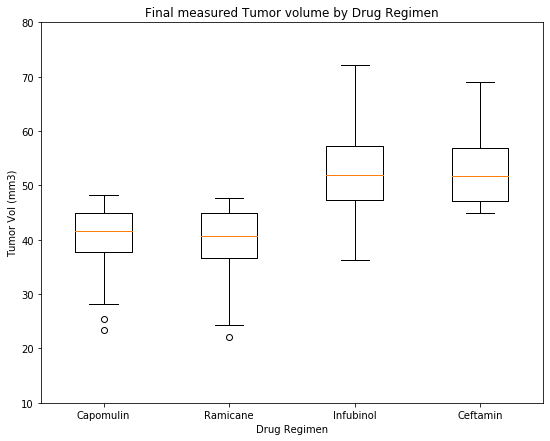

In [289]:
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
plt.boxplot(drug_values, labels=top_4)
plt.xticks([1,2,3,4],top_four)
plt.ylim(10, 80)

plt.show()

## Line and Scatter Plots

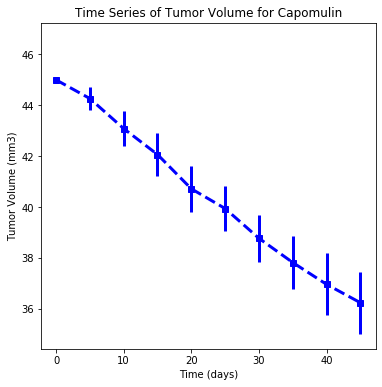

In [232]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Create dataframe only for Capomulin
capomulin_df = merged_df.loc[merged_df['Drug Regimen'] == 'Capomulin']

#aggregate and group by timepoint
cap_time_tumor = capomulin_df.groupby(['Timepoint']).agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)\
).round(3)
                                                         
#get values for x axis
                                                         
time_series = list(cap_time_tumor.index.values)
                                                         
#Use errorbarplot to plot x and y values
plt.errorbar(
    time_series,  # X values
    cap_time_tumor['Tumor_Vol_Mean'], # Y values
    yerr=cap_time_tumor['Tumor_Vol_SEM'], # Y-errors
    label="Time Series of Tumor Volume for Capomulin",
    fmt="bs--", # format line using dashed lines for plot()
    linewidth=3  # width of plot line
    )

# Add the descriptive title, x labels and y labels
plt.title("Time Series of Tumor Volume for Capomulin")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

# Set x and y limits 
plt.xlim(min(time_series)-max(time_series)*0.05, max(time_series)*1.05)
plt.ylim(min(cap_time_tumor['Tumor_Vol_Mean'])*0.95, max(cap_time_tumor['Tumor_Vol_Mean'])*1.05)
plt.rcParams["figure.figsize"] = [6,6]

plt.show()

## Correlation and Regression

In [128]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(cap_mouse_id['Mouse_weight'],cap_mouse_id['Tumor_vol_mean'])
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume is 0.84


The r-squared is: 0.8419461020261081
The equation of the regression line is: y = 0.95x + 21.55


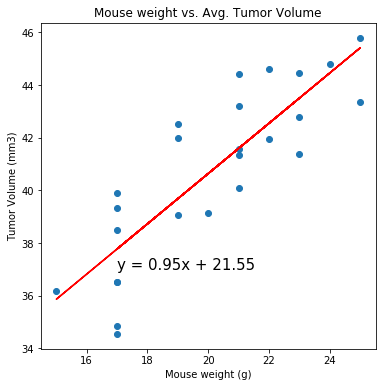

In [129]:
# Print out the r-squared value along with the plot.
x_values = cap_mouse_id['Mouse_weight']
y_values = cap_mouse_id['Tumor_vol_mean']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Add eqaution to graph
plt.annotate(line_eq,(17,37),fontsize=15,color="black")

#Formatting 
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")

#Print statements
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

plt.show()